# Data Preprocessing & Feature Engineering for Machine Learning

## Data Import and Inspection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


__Attributes:__

longitude: geographic coordinate (district´s east-west position)

latitude: geographic coordinate (district´s north-south position)

housing_median_age: median age of houses in district

total_rooms Sum of all rooms in district

total_bedrooms Sum of all bedrooms in district

population: total population in district

households: total households in district

median_income: median household income in district

median_house_value: median house value in district

ocean_proximity: District´s proximity to the ocean


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
data.describe(include='O')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


In [11]:
data.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
data.total_bedrooms.sort_values(ascending=False)

9880     6445.0
13139    6210.0
10309    5471.0
8985     5419.0
6057     5290.0
          ...  
20267       NaN
20268       NaN
20372       NaN
20460       NaN
20484       NaN
Name: total_bedrooms, Length: 20640, dtype: float64

In [15]:
data.total_bedrooms.value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [7]:
data[data.total_bedrooms.isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [9]:
data[data.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


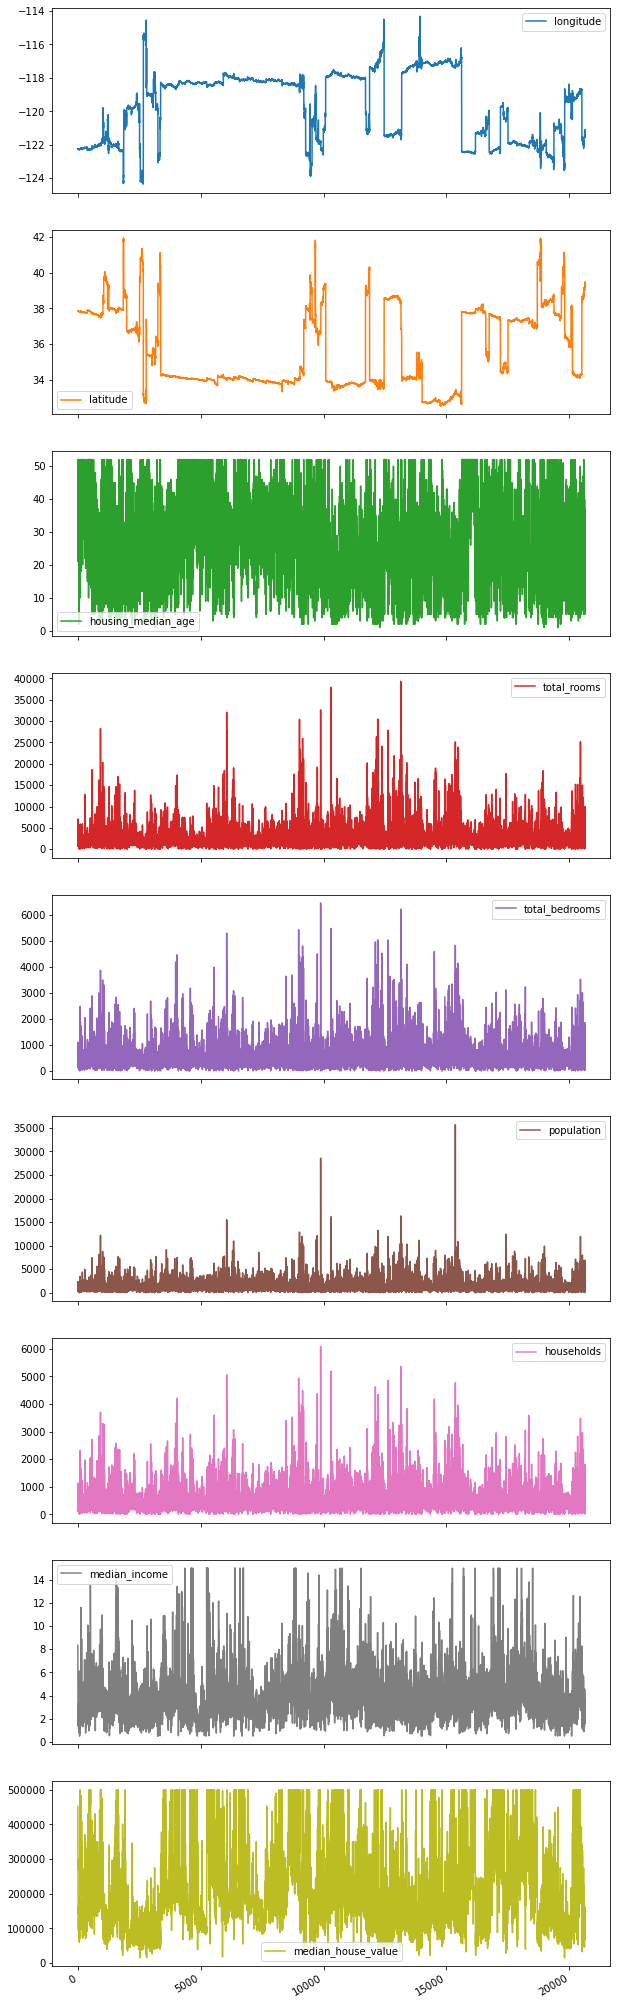

In [24]:
data.plot(subplots=True,figsize=(10,40));

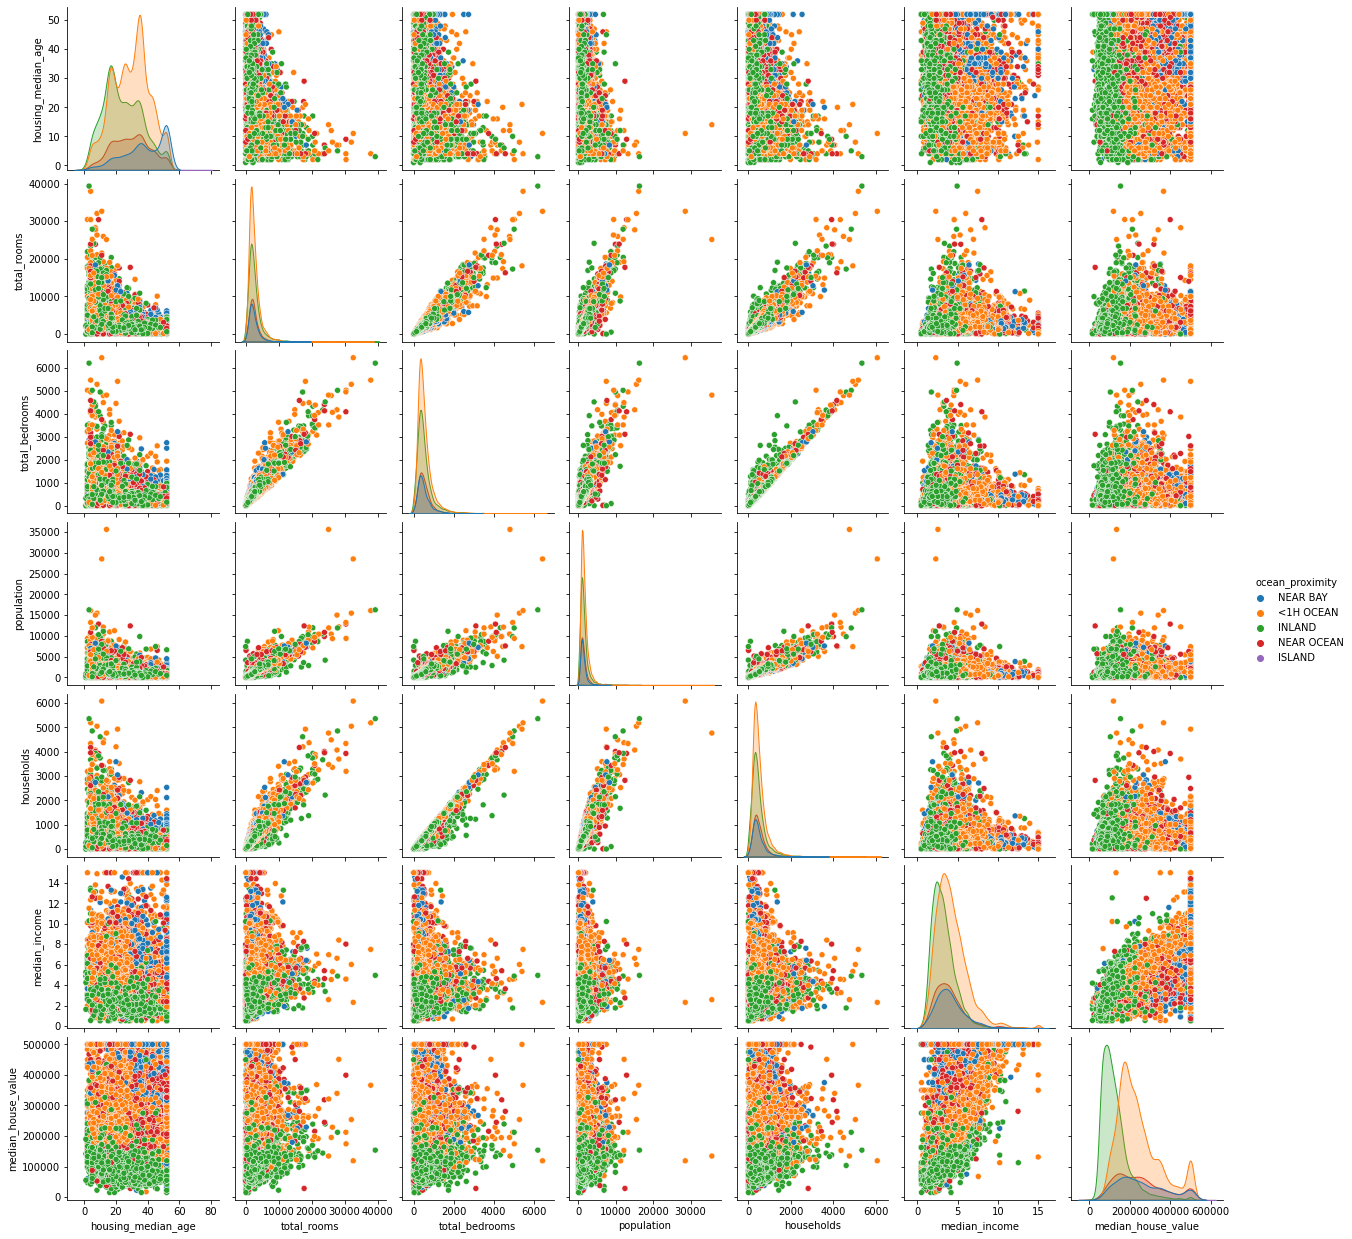

In [44]:
sns.pairplot(data = data.drop(['longitude','latitude'],axis=1),hue='ocean_proximity')

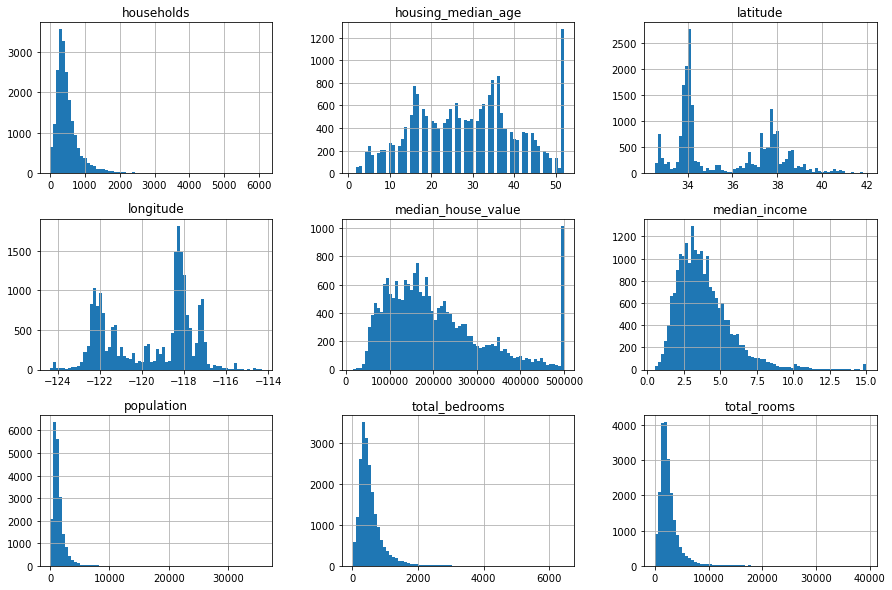

In [39]:
data.hist(bins=70,figsize=(15,10));

## Data Cleaning and Creating New Features

In [46]:
data['rooms_per_household'] = data.total_rooms/data.households

In [47]:
data.rooms_per_household

0        6.984127
1        6.238137
2        8.288136
3        5.817352
4        6.281853
           ...   
20635    5.045455
20636    6.114035
20637    5.205543
20638    5.329513
20639    5.254717
Name: rooms_per_household, Length: 20640, dtype: float64

In [48]:
data.rooms_per_household.sort_values()

5916       0.846154
8219       0.888889
3126       1.000000
14818      1.130435
17820      1.130435
            ...    
11862     59.875000
1913      61.812500
12447     62.422222
1979     132.533333
1914     141.909091
Name: rooms_per_household, Length: 20640, dtype: float64

In [49]:
data.rooms_per_household.nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [50]:
data.rooms_per_household.nsmallest(10,asc)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

In [51]:
data['pop_per_household'] = data.population/data.households

In [52]:
data['bedrooms_per_room'] = data.total_bedrooms/data.total_rooms

In [53]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,2.560606,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,3.122807,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,2.325635,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,2.123209,0.219892


In [54]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.429000,3.070655,0.213039
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.474173,10.386050,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,2.429741,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,2.818116,0.203162
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,3.282261,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


In [60]:
data.pop_per_household.sort_values(ascending=False).head(20)

19006    1243.333333
3364      599.714286
16669     502.461538
13034     230.172414
9172       83.171429
12104      63.750000
16420      51.400000
8874       41.214286
13366      33.952941
5986       21.333333
20352      19.312500
14756      18.821818
4479       18.500000
19435      18.444444
1039       17.177700
16672      16.937500
19524      16.048780
7164       15.812155
15790      15.602941
2511       14.000000
Name: pop_per_household, dtype: float64

In [61]:
data[data.pop_per_household>50]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
3364,-120.51,40.41,36.0,36.0,8.0,4198.0,7.0,5.5179,67500.0,INLAND,5.142857,599.714286,0.222222
9172,-118.59,34.47,5.0,538.0,98.0,8733.0,105.0,4.2391,154600.0,INLAND,5.123810,83.171429,0.182156
12104,-117.33,33.97,8.0,152.0,19.0,1275.0,20.0,1.6250,162500.0,INLAND,7.600000,63.750000,0.125000
13034,-121.15,38.69,52.0,240.0,44.0,6675.0,29.0,6.1359,225000.0,INLAND,8.275862,230.172414,0.183333
16420,-121.29,37.89,26.0,161.0,27.0,1542.0,30.0,5.7485,162500.0,INLAND,5.366667,51.400000,0.167702
16669,-120.70,35.32,46.0,118.0,17.0,6532.0,13.0,4.2639,350000.0,NEAR OCEAN,9.076923,502.461538,0.144068
19006,-121.98,38.32,45.0,19.0,5.0,7460.0,6.0,10.2264,137500.0,INLAND,3.166667,1243.333333,0.263158
